# NAME: BARANOV MAXIM
# GROUP: IT3-2106
# DATASET FROM KAGGLE: WineQT.csv
# Goal: Determine factors, which affect to quality of wine between ANOVA-test and T-test for comparing results of our research.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
wine_data = pd.read_csv('WineQT.csv')

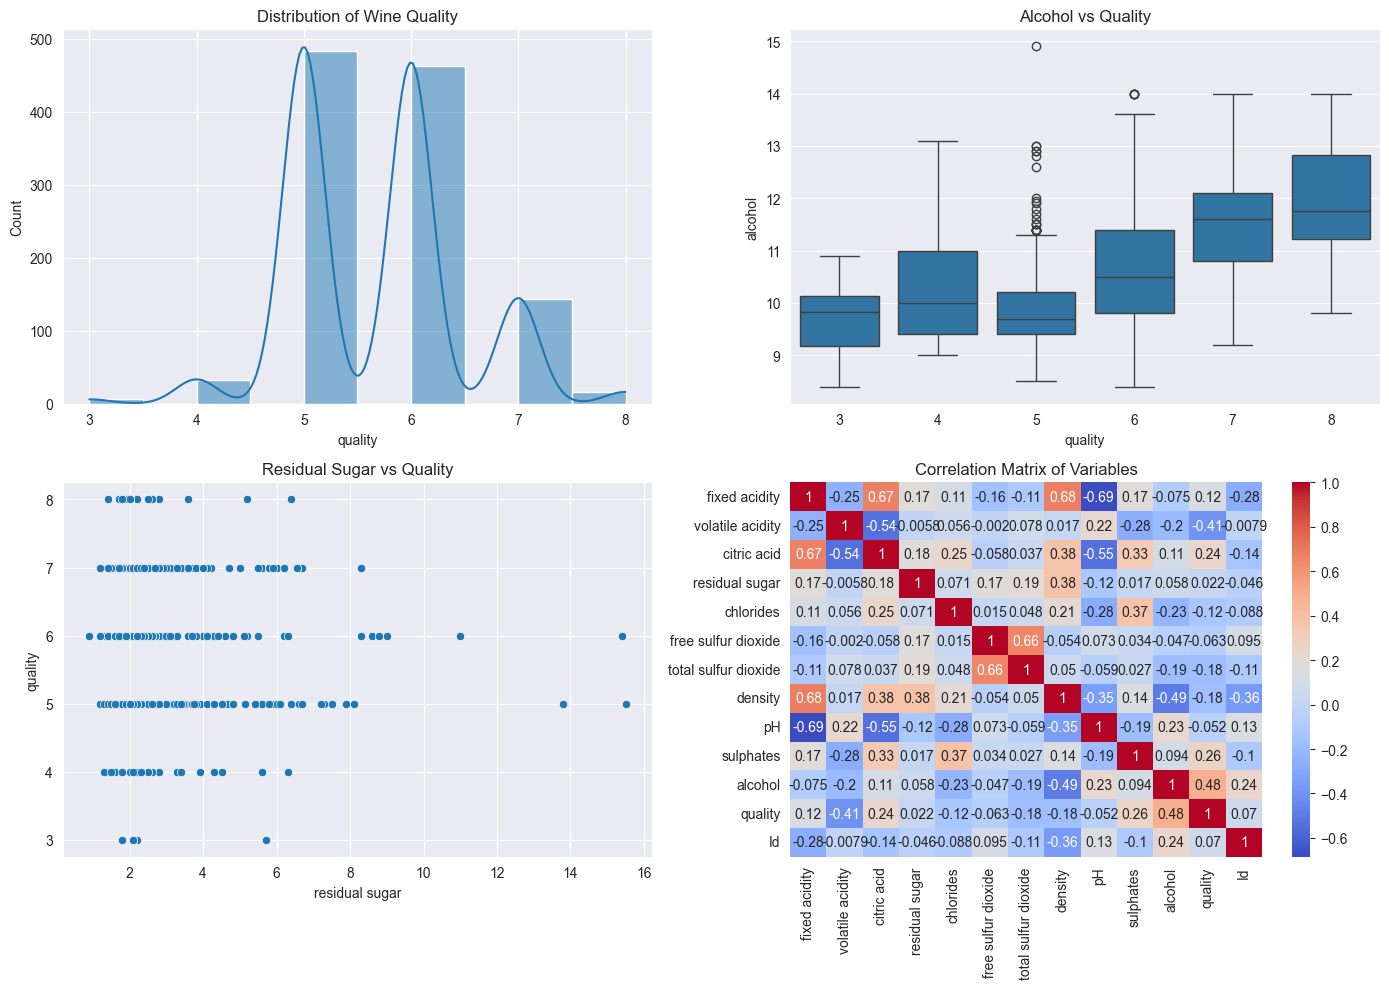

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Quality Distribution
sns.histplot(wine_data['quality'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Wine Quality')

# Affects alcohol to quality
sns.boxplot(x='quality', y='alcohol', data=wine_data, ax=axes[0, 1])
axes[0, 1].set_title('Alcohol vs Quality')

# Affects sugar to quality
sns.scatterplot(x='residual sugar', y='quality', data=wine_data, ax=axes[1, 0])
axes[1, 0].set_title('Residual Sugar vs Quality')

# Correlation matrix
corr_matrix = wine_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Correlation Matrix of Variables')

plt.tight_layout()
plt.show()

In [4]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

cleaned_wine_data = remove_outliers(wine_data)

print(f"Size of data: {wine_data.shape}")
print(f"Size of data after cleaning: {cleaned_wine_data.shape}")

Size of data: (1143, 13)
Size of data after cleaning: (834, 13)


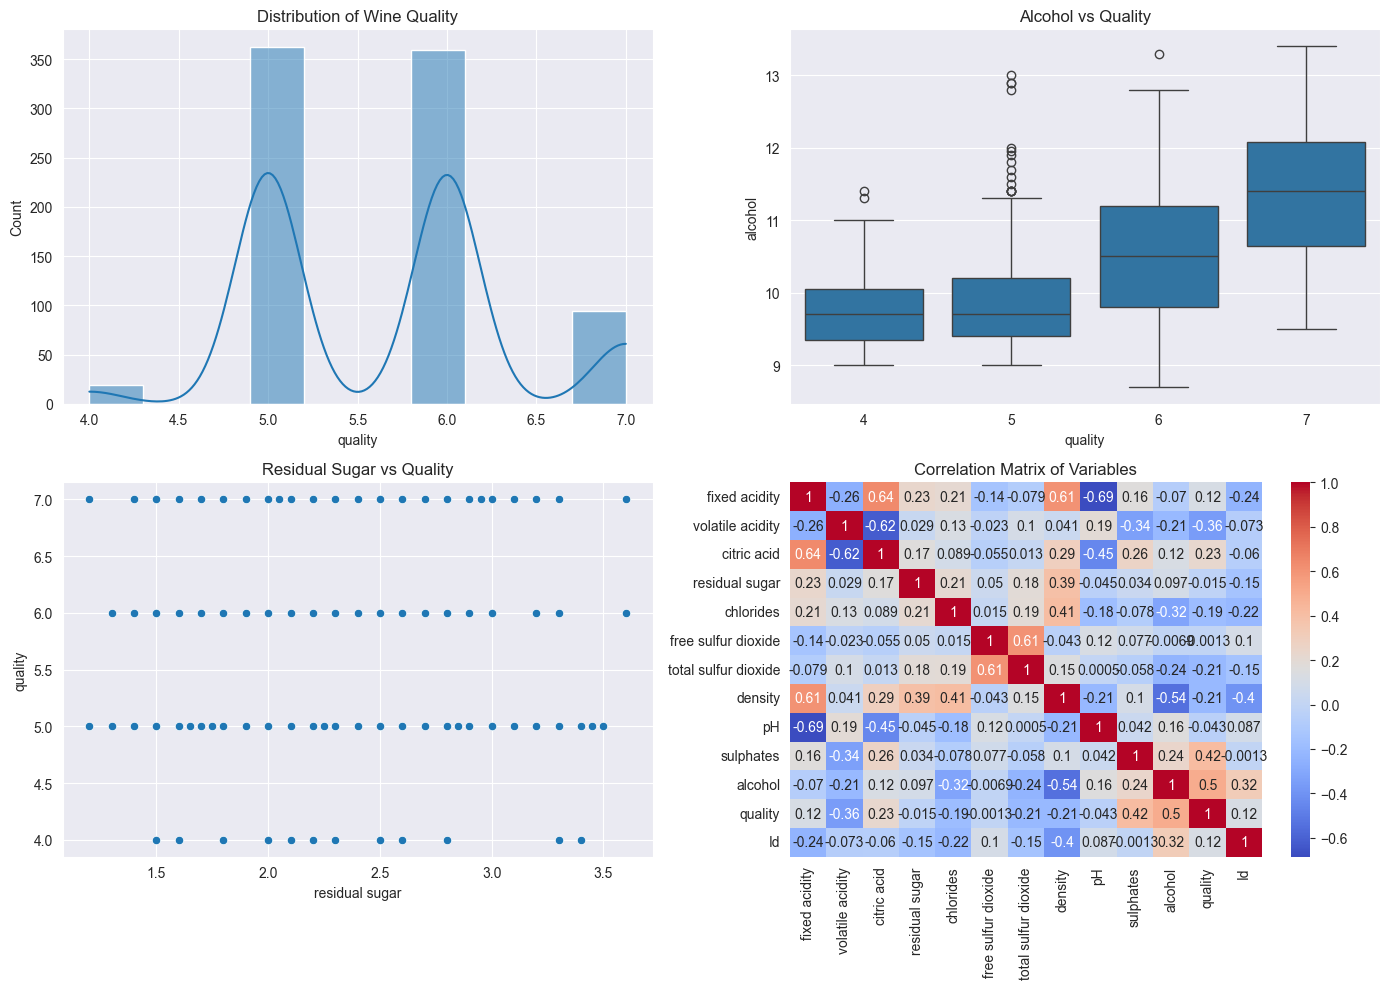

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Quality Distribution
sns.histplot(cleaned_wine_data['quality'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Wine Quality')

# Affects alcohol to quality
sns.boxplot(x='quality', y='alcohol', data=cleaned_wine_data, ax=axes[0, 1])
axes[0, 1].set_title('Alcohol vs Quality')

# Affects sugar to quality
sns.scatterplot(x='residual sugar', y='quality', data=cleaned_wine_data, ax=axes[1, 0])
axes[1, 0].set_title('Residual Sugar vs Quality')

# Correlation matrix
corr_matrix = cleaned_wine_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Correlation Matrix of Variables')

plt.tight_layout()
plt.show()

In [6]:
cleaned_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [7]:
# ANOVA

'''
    Q("residual sugar") * Q("sulphates")
    Влияние остаточного сахара,
    Влияние сульфатов,
    Взаимодействие между остаточным сахаром и сульфатами.
'''

model = ols('quality ~ Q("residual sugar") * Q("sulphates")', data=cleaned_wine_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                        sum_sq     df           F  \
Q("residual sugar")                   0.358952    1.0    0.860273   
Q("sulphates")                       73.307977    1.0  175.691869   
Q("residual sugar"):Q("sulphates")    0.004369    1.0    0.010471   
Residual                            346.320073  830.0         NaN   

                                          PR(>F)  
Q("residual sugar")                 3.539318e-01  
Q("sulphates")                      1.633630e-36  
Q("residual sugar"):Q("sulphates")  9.185219e-01  
Residual                                     NaN  


##### Q("residual sugar"):

1. sum_sq = 0.358952 — Очень маленькая сумма квадратов отклонений, что указывает на то, что вариация в остаточном сахаре слабо объясняет вариацию в качестве вина.
2. df = 1.0 — Степень свободы для остаточного сахара.
3. F = 0.860273 — Низкая F-статистика, что указывает на то, что остаточный сахар не оказывает значительного влияния на качество вина.
4. PR(>F) = 0.354136 — p-значение выше 0.05, что говорит о том, что влияние остаточного сахара на качество вина статистически незначимо. Мы не можем отвергнуть нулевую гипотезу.

##### Q("sulphates"):

1. sum_sq = 73.307977 — Сумма квадратов довольно большая, что указывает на то, что содержание сульфатов сильно влияет на качество вина.
2. df = 1.0 — Степень свободы для содержания сульфатов.
3. F = 175.691869 — Очень высокая F-статистика, что указывает на значительное влияние сульфатов на качество вина.
4. PR(>F) = 1.635e-36 — Очень маленькое p-значение (значительно меньше 0.05), что говорит о значимости влияния сульфатов на качество вина. Мы можем отвергнуть нулевую гипотезу.

##### Q("residual sugar") and ("sulphates"):

1. sum_sq = 0.004369 — Сумма квадратов отклонений для взаимодействия между остаточным сахаром и сульфатами очень мала, что указывает на то, что их взаимодействие практически не влияет на качество вина.
2. df = 1.0 — Степень свободы для взаимодействия.
3. F = 0.010471 — Очень низкая F-статистика, указывающая на то, что взаимодействие этих двух факторов не оказывает значительного влияния на качество вина.
4. PR(>F) = 0.918521 — Очень высокое p-значение (намного выше 0.05), что означает, что взаимодействие между остаточным сахаром и сульфатами статистически незначимо.

##### Residual (Остаток):

1. sum_sq = 346.302975 — Сумма квадратов остаточных отклонений, которая не объясняется факторами, включёнными в модель. Это отклонения, которые остаются необъясненными.
2. df = 830.0 — Степени свободы для остаточных отклонений, которые равны количеству наблюдений минус количество параметров модели.

Заключение:
Остаточный сахар сам по себе не оказывает значительного влияния на качество вина.
Сульфаты оказывают значительное влияние на качество вина.
Взаимодействие остаточного сахара и сульфатов не оказывает значительного влияния на качество вина.

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = cleaned_wine_data[['residual sugar', 'sulphates']]
y = cleaned_wine_data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [10]:
random_forest = RandomForestClassifier(random_state=13, n_estimators=100)
random_forest.fit(X_train_scaled, y_train)
y_pred_rf = random_forest.predict(X_test_scaled)

In [11]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg, zero_division=0))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         7
           5       0.57      0.71      0.63       115
           6       0.43      0.46      0.45        99
           7       0.00      0.00      0.00        30

    accuracy                           0.51       251
   macro avg       0.25      0.29      0.27       251
weighted avg       0.43      0.51      0.47       251



In [12]:
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))


Random Forest Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         7
           5       0.63      0.60      0.62       115
           6       0.56      0.69      0.62        99
           7       0.20      0.13      0.16        30

    accuracy                           0.56       251
   macro avg       0.35      0.36      0.35       251
weighted avg       0.53      0.56      0.54       251



In [13]:
# 3. t-тест: Сравнение качества вина между двумя группами (высокий и низкий уровень сульфатов)
median_sulphates = cleaned_wine_data['sulphates'].median()

low_sulphates = cleaned_wine_data[cleaned_wine_data['sulphates'] <= median_sulphates]['quality']
high_sulphates = cleaned_wine_data[cleaned_wine_data['sulphates'] > median_sulphates]['quality']

t_stat, p_value_test = stats.ttest_ind(low_sulphates, high_sulphates)
print(f"T-test results: t_stat = {t_stat}, p_value = {p_value_test}")

# 4. Пример ANOVA: Сравнение качества вина между тремя группами по уровню сульфатов
low_sulphates_group = cleaned_wine_data[cleaned_wine_data['sulphates'] <= cleaned_wine_data['sulphates'].quantile(0.33)]
mid_sulphates_group = cleaned_wine_data[(cleaned_wine_data['sulphates'] > cleaned_wine_data['sulphates'].quantile(0.33)) &
                                        (cleaned_wine_data['sulphates'] <= cleaned_wine_data['sulphates'].quantile(0.66))]
high_sulphates_group = cleaned_wine_data[cleaned_wine_data['sulphates'] > cleaned_wine_data['sulphates'].quantile(0.66)]

model = ols('quality ~ C(sulphates)', data=cleaned_wine_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA results:")
print(anova_table)

T-test results: t_stat = -11.302082893131212, p_value = 1.181123915328673e-27

ANOVA results:
                  sum_sq     df         F        PR(>F)
C(sulphates)  108.165609   58.0  4.638951  7.790093e-24
Residual      311.561010  775.0       NaN           NaN


#### T-test Results:
1. t-stat = -11.30: Отрицательное значение говорит о том, что среднее значение качества в группе с низким уровнем сульфатов меньше, чем в группе с высоким уровнем сульфатов.
2. p-value = 1.18e-27: Есть значимая разница в качестве вина между группами с низким и высоким уровнем сульфатов.